# Manipuler des données dans R

En statistique, les données constituent le point de départ de toute analyse, un premier travail de mise en forme de ces données est presque toujours indispensable. Il faudra savoir maitriser des opérations comme:

* Importation de données sous différents formats, 
* exporter des données et des résultats sous différents formats,
* concaténer ou extraire des données, 
* repérer les individus ayant des données manquantes ou aberrantes.
* changer le type de certaines variables pour les adapter aux traitements envisagés,
* $\ldots$

On abordera le concept de **tidy data**, les extensions du **tidyverse** comme **dplyr** ou **ggplot2** partent du principe que les données sont “bien rangées” sous forme de tidy data.

R fournit des outils et des capacités de programmation pour effectuer ces différentes tâches.

## Importer des données

Les données sont initialement collectées, stockées sous différents formats, éventuellement prétraitées par un logiciel ou extraites d'une base de données. 

Chaque logiciel ayant son propre format de stockage, le plus simple est souvent d'échanger les données par un format commun à tous qui sera le plus souvent **le format texte** ( .csv par exemple).

On peut également utiliser **les formats propriétaires** (SAS,SPSS,...) des autres logiciels en utilisant un package adapté (le package **foreign** par exemple), le choix dépendant du contexte et du volume des données.

## Importer des données en format texte
### Cas des fichiers **csv** 

Les avantages des fichiers **csv**:

  - Peut être lu par n'importe quel logiciel passé, présent et probablement futur.
  - Pour la compatibilité entre plate-forme (Windows, Mac, Linux).
  - Pour la facilité de lecture par un être humain comparativement à d'autres formats tels que XML, HL7, JSON etc.

**Mais** pas forcément adapté aux gros volumes de données pour son volume de stockage et la rapidité de lecture.

R lit des données en format texte avec les fonctions **read.table()**,**read.csv()**,**scan()**,**read.fwf()**,$\ldots$

* Le fichier "donnees.csv" est stocké dans le répertoire data sitée dans le répertoire de travail 
    
    - pour connaître le répertoire de travail, utiliser la fonction **getwd()**
    - pour définir le répertoire de travail, la fonction **setwd()**
    
 Le résultat de la fonction **read.table** ou **read.csv** est de type **data-frame**.

In [43]:
# Lecture du fichier donnees.csv
getwd() # repertoire de travail
don <- read.csv(file = "data/donnees.csv",header=TRUE,sep=";",dec=",",row.names=1)

[1] "/Users/viryl/formation/FormationContinue/ATMO/ATMO_IntroR/notebooks"

   - l'argument **sep** : indique que les valeurs sont séparées par **";"** (**" "** pour un espace, **"\t"** pour une tabulation,$\ldots$)
   - l'argument **dec** : indique que le séparateur de décimal est **","**
   - l'argument **header** : indique si la première ligne contient les noms des variables (TRUE) ou non(FALSE).
   - l'argument **row.names** : indique que la colonne 1 n'est pas une variable mais l'identifiant des individus.
   

In [44]:
# "mode" et "class" 
mode(don)
class(don)

[1] "list"

[1] "data.frame"

In [45]:
# Statistiques des variables du data.frame
summary(don)

     taille          poids          pointure    sexe 
 Min.   :158.0   Min.   : 5.00   Min.   :42.0   M:3  
 1st Qu.:166.8   1st Qu.:38.50   1st Qu.:42.5        
 Median :175.5   Median :72.00   Median :43.0        
 Mean   :172.5   Mean   :52.33   Mean   :43.0        
 3rd Qu.:179.8   3rd Qu.:76.00   3rd Qu.:43.5        
 Max.   :184.0   Max.   :80.00   Max.   :44.0        

#### Fonctions utilisees sur un data-frame

In [46]:
# Attributs d'un data-frame
attributes(don)

$names
[1] "taille"   "poids"    "pointure" "sexe"    

$class
[1] "data.frame"

$row.names
[1] "roger"    "theodule" "nicolas"

In [47]:
# Afficher de manière compacte la structure d'un objet R 
str(don)

'data.frame':	3 obs. of  4 variables:
 $ taille  : num  184 176 158
 $ poids   : int  80 5 72
 $ pointure: int  44 43 42
 $ sexe    : Factor w/ 1 level "M": 1 1 1


In [48]:
# Nom des variables 
names(don)

[1] "taille"   "poids"    "pointure" "sexe"

In [49]:
# Nombre de lignes(individus) et de colonnes(variables)
nrow(don)
ncol(don)

[1] 3

[1] 4

In [50]:
# Nom des lignes(1.) et des colonnes(2.)
dimnames(don)

[[1]]
[1] "roger"    "theodule" "nicolas" 

[[2]]
[1] "taille"   "poids"    "pointure" "sexe"

#### Un caractère spécial peut indiquer qu'il y a des données manquantes:

Le fichier **don2.csv** contient des données manquantes codées **"\*\*\*"**, on ajoute l'argument **na.strings**

In [51]:
don2 <- read.csv(file = "data/don2.csv",header=TRUE,sep=";",dec=",",row.names=1,na.strings="***")
summary(don2)
mean(don2$poids)
mean(don2$poids,na.rm=TRUE)

     taille          poids       pointure       sexe  
 Min.   :100.0   Min.   :15   Min.   :22.00   F   :2  
 1st Qu.:110.0   1st Qu.:30   1st Qu.:30.50   M   :3  
 Median :160.0   Median :72   Median :40.00   NA's:1  
 Mean   :145.9   Mean   :55   Mean   :36.17           
 3rd Qu.:175.5   3rd Qu.:78   3rd Qu.:42.75           
 Max.   :184.0   Max.   :80   Max.   :44.00           
 NA's   :1       NA's   :1                            

[1] NA

[1] 55

#### Le chemin peut-être une URL:

In [1]:
df <- read.table("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/scores_timed.csv",header=TRUE,row.names = 1,sep = ",")
summary(df)

     SCORE            TIME    DECIMAL.TIME            CLASS  
 Min.   : 6.0   03:22:50:1   Min.   :0.140   BEST        :2  
 1st Qu.: 8.0   07:42:51:1   1st Qu.:0.320   INTERMEDIATE:1  
 Median :13.0   09:30:03:1   Median :0.400   WORST       :2  
 Mean   :12.4   12:01:03:1   Mean   :0.372                   
 3rd Qu.:16.0   12:01:29:1   3rd Qu.:0.500                   
 Max.   :19.0                Max.   :0.500                   

#### On peut spécifier le mode des variables

Utiliser l'option **colClasses**

**colClasses=c("character",rep("numeric",5))** indique que la première variable est de mode "character" et les 5 suivantes sont numériques.

### La fonction **scan**

La fonction **scan** est plus flexible que **read.table**.

* Il est possible de spécifier le mode des variables:

In [ ]:
mydata <- scan("data/donnees.csv",skip=1,sep=";",dec=",",what = list("", 0, 0,0,""))
class(mydata)
str(mydata)
mydata[[1]] # premiere variable
mydata[[1]][1] # 

Dans cet exemple, **scan** lit *5 variables*, la première en mode caractère, les trois suivantes sont en mode numérique et la cinquième en mode caractère.

**mydata** est une liste de 5 vecteurs.

* scan() peut être utilisée pour créer des objets de mode différent (vecteurs, matrices, tableaux de données, listes,...).
*
* Par défaut, c'est-à-dire si what est omis, scan() crée un vecteur.

Pour en savoir plus **help(scan)**

## Importer des fichiers Excel
Le package **readxl** est l'outil le plus simple pour importer des fichiers *Excel* au format **xls** ou **xlsx**, il n'a pas de dépendances externes et il est facile à installer sur tout système. Il existe d'autres packages comme *gdata, xlsx, xlsReadWrite*...

Le package **readxl** fait partie du package **tidyverse** mais il peut être installé séparément et devra être chargé séparément.

On utilisera le fichier Excel "datasets.xls" (ou "datasets.xlsx") fournit par le package *readxl*.

### Lire le fichier excel:
On utilise la fonction **read_excel**, l'objet fournit est de type "*data.frame*,*tbl_df*,*tbl*". La fonction lit à la fois les fichiers de type **xls et xlsx**, il détermine le format à partir de l'extension.

In [ ]:
# Importer le package
library("readxl")

In [3]:
# Path du fichier excel "datasets.xls"
datasets <- readxl_example("datasets.xls") # chemin de stockage du fichier excel "datasets.xls"
datasets
# Lecture du fichier excel "datasets.xls"
df <- read_excel(datasets)

[1] "/Users/viryl/R/lib/readxl/extdata/datasets.xls"

In [54]:
# "class" de l'objet df
class(df)

[1] "tbl_df"     "tbl"        "data.frame"

In [4]:
summary(df)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
   Species         
 Length:150        
 Class :character  
 Mode  :character  
                   
                   
                   

Il est possible de spécifier la feuille et la plage de cellules que l’on souhaite importer avec les arguments **sheet** et **range**.
### Gestion des feuilles d'un classeur Excel
Un **classeur Excel** peut contenir plusieurs feuilles. 

In [55]:
# Liste des feuilles du classeur "datasets.xls".
excel_sheets(datasets)

[1] "iris"     "mtcars"   "chickwts" "quakes"

In [56]:
# Lecture d'une des feuilles
df <- read_excel(datasets,sheet = "mtcars")
class(df)
summary(df)

[1] "tbl_df"     "tbl"        "data.frame"

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

*Remarque*: par défaut la fonction read_excel lit la première feuille du fichier Excel fournit en argument.<br>

### Plusieurs façons de spécifier quelles cellules sont lues.
#### Une partie des lignes du tableau de données

In [5]:
read_excel(datasets,sheet = "iris",n_max=3)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa

In [7]:
read_excel(datasets,sheet = "iris",range = cell_rows(1:4))

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa

#### Une partie des colonnes

In [8]:
read_excel(datasets,sheet = "iris",range = cell_cols("B:D"))

Sepal.Width Petal.Length Petal.Width
1   3.5         1.4          0.2        
2   3.0         1.4          0.2        
3   3.2         1.3          0.2        
4   3.1         1.5          0.2        
5   3.6         1.4          0.2        
6   3.9         1.7          0.4        
7   3.4         1.4          0.3        
8   3.4         1.5          0.2        
9   2.9         1.4          0.2        
10  3.1         1.5          0.1        
11  3.7         1.5          0.2        
12  3.4         1.6          0.2        
13  3.0         1.4          0.1        
14  3.0         1.1          0.1        
15  4.0         1.2          0.2        
16  4.4         1.5          0.4        
17  3.9         1.3          0.4        
18  3.5         1.4          0.3        
19  3.8         1.7          0.3        
20  3.8         1.5          0.3        
21  3.4         1.7          0.2        
22  3.7         1.5          0.4        
23  3.6         1.0          0.2        
24  3.3         1.7          0.5        
25  3.4         1.9          0.2        
26  3.0         1.6          0.2        
27  3.4         1.6          0.4        
28  3.5         1.5          0.2        
29  3.4         1.4          0.2        
30  3.2         1.6          0.2        
⋮   ⋮           ⋮            ⋮          
121 3.2         5.7          2.3        
122 2.8         4.9          2.0        
123 2.8         6.7          2.0        
124 2.7         4.9          1.8        
125 3.3         5.7          2.1        
126 3.2         6.0          1.8        
127 2.8         4.8          1.8        
128 3.0         4.9          1.8        
129 2.8         5.6          2.1        
130 3.0         5.8          1.6        
131 2.8         6.1          1.9        
132 3.8         6.4          2.0        
133 2.8         5.6          2.2        
134 2.8         5.1          1.5        
135 2.6         5.6          1.4        
136 3.0         6.1          2.3        
137 3.4         5.6          2.4        
138 3.1         5.5          1.8        
139 3.0         4.8          1.8        
140 3.1         5.4          2.1        
141 3.1         5.6          2.4        
142 3.1         5.1          2.3        
143 2.7         5.1          1.9        
144 3.2         5.9          2.3        
145 3.3         5.7          2.5        
146 3.0         5.2          2.3        
147 2.5         5.0          1.9        
148 3.0         5.2          2.0        
149 3.4         5.4          2.3        
150 3.0         5.1          1.8

**ou**

In [ ]:
read_excel(datasets,sheet = "iris",range = cell_cols(2:4))

#### Une partie des lignes et une partie des colonnes 

In [60]:
read_excel(datasets,sheet = "iris",range = "B1:D5")

Sepal.Width Petal.Length Petal.Width
1 3.5         1.4          0.2        
2 3.0         1.4          0.2        
3 3.2         1.3          0.2        
4 3.1         1.5          0.2

**ou**

In [ ]:
read_excel(datasets,range ="iris!B1:D5")

#### "Not Available" / Missing Values représenté par une chaîne de caractères

In [62]:
df <-read_excel(datasets,sheet = "iris",range="B1:E5",na="1.4")

In [63]:
df
summary(df)
mean(df$Petal.Length)
mean(df$Petal.Length,na.rm=TRUE)

Sepal.Width Petal.Length Petal.Width Species
1 3.5          NA          0.2         setosa 
2 3.0          NA          0.2         setosa 
3 3.2         1.3          0.2         setosa 
4 3.1         1.5          0.2         setosa

  Sepal.Width     Petal.Length   Petal.Width    Species         
 Min.   :3.000   Min.   :1.30   Min.   :0.2   Length:4          
 1st Qu.:3.075   1st Qu.:1.35   1st Qu.:0.2   Class :character  
 Median :3.150   Median :1.40   Median :0.2   Mode  :character  
 Mean   :3.200   Mean   :1.40   Mean   :0.2                     
 3rd Qu.:3.275   3rd Qu.:1.45   3rd Qu.:0.2                     
 Max.   :3.500   Max.   :1.50   Max.   :0.2                     
                 NA's   :2                                      

[1] NA

[1] 1.4

### Quelques références
[Article "readxl"](https://readxl.tidyverse.org/articles/index.html) <br>
[Introduction à R et au tidyverse](https://readxl.tidyverse.org/)<br>
[Cookbook for R](http://www.cookbook-r.com/Manipulating_data/)<br>
...

## Importer des fichiers avec un format propriétaire

R peut également lire des fichiers dans d'autres formats (**Matlab, SAS, SPSS**,...) et accéder à des **bases de données**.

* Le package **foreign** permet d'importer des données en format propriétaire binaire tels que **Stata, SAS, SPSS, etc**.

  **library**(foreign) <br>
  **read.dta**("calf pneu.dta") # for Stata files<br>
  **read.xport**("file.xpt") # for SAS XPORT format<br>
  **read.spss**("file.sav") # for SPSS format<br>
  **read.mpt**("file.mtp") # for Minitab Portable Worksheet<br>

Une autre solution pour des **fichiers SPSS**, le package **Hmisc**<br>

## Base de données relationnelles et autres formats

Certains packages permettent de se connecter directement sur des bases de données de type **MySQL** ou **PostgreSQL**
(MongoDB,Redis,ousqlite,...). Dans ce cas, le mode d’interaction avec les données est légèrement différent
 car on utilise alors le langage de requête propre au langage, à moins d’utiliser des packages qui permettent d’assurer
 la conversion à partir des commandes R habituelles telles que **subset()**.

Pour en savoir plus : 

* [Cookbook for R](http://www.cookbook-r.com/Manipulating_data/)

## Sauvegarder des données ou des résultats

Une fois le *traitement des données* et *les analyses effectuées*, *les résultats obtenus*, il est souvent important de faire une sauvegarde du travail effectué pour les communiquer à d'autres personnes ou d'autres logiciels ou les réutiliser dans d'autres analyses.

### En format texte

Le format texte est utilisé, il sera compatible avec d'autres logiciels, on utilise la fonction **write.table()**.

In [ ]:
tablo_res <- matrix(runif(40), ncol=4)
# sauvegarde les resulatts dans le repertoire resultat
setwd("/home/viryl/notebooks/ced-introR/TP/data/resultat")
write.table(tablo_res,"monfichier.csv",sep=";",row.names=FALSE)



### En format binaire RData

* Exporter les résultats et/ou les données dans un fichier binaire suffixé
**.Rdata** avec la fonction **save()**. <br> 

R sera capable de le relire par la suite grâce à la fonction **load()**

   **save(file="nom du fichier",liste des variables)** ( voir help(save))
   

In [ ]:
x <- runif(20)
y <- list(a = 1, b = TRUE, c = "oops")
getwd()
save(x, y, file = "xy.RData")

* L'utilisation des fichiers sauvegardées par la commande **save()** se fait par la commande **load()**.

In [ ]:
rm(list=ls())
"avant load"
ls()
load(file="xy.RData")
"après load"
ls()

## Manipuler des variables

* **Changer le type d'une variable**: à l'issue d'une importation, une variable qualitative dont les modalitées sont numériques sera comprise par R comme une variable quantitative,...

* **Découper en classes une variable quantitative**: le passage d'une variable quantitative à une variable qualitative est parfois nécessaire en statistiques pour l'adapter à la méthode utilisée (AFC,AFCM,...)

* **Modifier les niveaux d'une variable qualitative**: fusionner un ou plusieurs niveaux en fonction des effectifs,...

* **Repérer les données manquantes**: permettre la prise en compte des données manquantes dans le traitement statistique des données.

* **Repérer les données aberrantes**: permettre la prise en compte des données aberrantes dans le traitement statistique des données.

* ...

### Quantitatives ou qualitative?

 Trois méthodes:
 

In [64]:
# on genere une variable X
X <-c(rep(5,2),rep(12,4),13)
X
mode(X)
class(X)
summary(X)

[1]  5  5 12 12 12 12 13

[1] "numeric"

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00    8.50   12.00   10.14   12.00   13.00 

In [65]:
# Une variable qualitative?
Xq <- as.factor(X)
mode(Xq)
class(Xq)
is.numeric(Xq)
summary(Xq)

[1] "numeric"

[1] "factor"

[1] FALSE

5 12 13 
 2  4  1

In [ ]:
# Une variable quantitative : de classe "numeric"
is.numeric(X)
# Statistques descriptives
summary(X)

Les trois instructions nous indiquent que X est une variable quantitative.

### Variable qualitative vers variable quantitative
* Avec recodification des modalités: 1 seule étape

Par défaut, la conversion d'un facteur en variable quantitative, utilise la recodification des modalités à **1 to nlevels(x)**

In [66]:
Xqual <- factor(c(rep(5,2),seq(0,6,by=2),13))
Xqual
nlevels(Xqual)
summary(Xqual)
is.factor(Xqual)
is.numeric(Xqual)
as.numeric(Xqual)
summary(as.numeric(Xqual))

[1] 5  5  0  2  4  6  13
Levels: 0 2 4 5 6 13

[1] 6

0  2  4  5  6 13 
 1  1  1  2  1  1

[1] TRUE

[1] FALSE

[1] 4 4 1 2 3 5 6

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.500   4.000   3.571   4.500   6.000 

* Sans recodification des modalités

Si on veut éviter la recofication, lorsque la valeur des modalités a un sens de quantité, il sera nécessaire de faire une première conversion de mode en mode **"character"**, avant la conversion en **"numeric"**.

In [67]:
Xqual
prov <- as.character(Xqual)
prov
Xquant <- as.numeric(prov) # as.numeric(as.character(Xqual))
Xquant
summary(Xquant)

[1] 5  5  0  2  4  6  13
Levels: 0 2 4 5 6 13

[1] "5"  "5"  "0"  "2"  "4"  "6"  "13"

[1]  5  5  0  2  4  6 13

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     3.0     5.0     5.0     5.5    13.0 

### Variable quantitative vers variable qualitative
* En conservant les valeurs de la variable quantitative

In [ ]:
rm(list=ls())
ls()
X <- seq(0,10,2)
X
summary(X)
Xqual <- as.factor(X)
Xqual
summary(Xqual)

### Découpage en classes d'une variable quantitative

Le découpage en classes d'une variable quantitatives peut se faire avec **deux approches**:

* Les **seuils des classes** sont choisis par les utilisateurs: pour définir ces seuils de façon automatique, on utilisera la fonction **cut**. 

Les bornes des intervals sont fournies à la fonction cut, les classes sont de la forme $\bf{] a_i,a_{i+1}]}$.

In [1]:
set.seed(654) # on fixe la graine du generateur
X <- rnorm(n=100,mean=0,sd=1)
class(X)
# Decoupage en 3 niveaux: [min(X),-0.2],[-0.2,0.2],[0.2,max(X)]
Xqual <- cut(X,breaks = c(min(X)-1e-10,-0.2,0.2,max(X)))
class(Xqual)
table(Xqual)
summary(Xqual) # ou table(Xqual)

[1] "numeric"

[1] "factor"

Xqual
(-3.27,-0.2]   (-0.2,0.2]   (0.2,1.69] 
          41           20           39 

(-3.27,-0.2]   (-0.2,0.2]   (0.2,1.69] 
          41           20           39

On indique "$min(X)-1e-10$" pour que le minimum appartienne à la classe.

* Un découpage automatique proposant **des effectifs équivalents dans chaque classes**: si nous voulons des effectifs équilibrés dans chacune des trois modalités, on utilisera la **fonction quantile**.

In [69]:
decoupe <- quantile(X,probs=seq(0,1,length=4)) 
decoupe
decoupe[1] <- decoupe[1]-1e-10
Xqual <- cut(X,decoupe)
table(Xqual)

0%  33.33333%  66.66667%       100% 
-3.2668559 -0.4369993  0.3986732  1.6914138

Xqual
(-3.27,-0.437] (-0.437,0.399]   (0.399,1.69] 
            34             33             33 

### Modifier les modalités d'un facteur

* Modifier les labels des modalités

In [70]:
Xqual <- cut(X,decoupe)
levels(Xqual)
#Xqual
table(Xqual)
#
levels(Xqual) <- c(1,2,3) # modification les labels des modalités
#Xqual
table(Xqual)

[1] "(-3.27,-0.437]" "(-0.437,0.399]" "(0.399,1.69]"

Xqual
(-3.27,-0.437] (-0.437,0.399]   (0.399,1.69] 
            34             33             33 

Xqual
 1  2  3 
34 33 33 

* Fusionner un ou plusieurs niveaux

In [71]:
levels(Xqual)
levels(Xqual) <- c(1,2,1)
levels(Xqual)
table(Xqual)

[1] "1" "2" "3"

[1] "1" "2"

Xqual
 1  2 
67 33 

* Définir un niveau de référence: pour certaines méthodes, il faudra tenir compte de l'ordre d'apparition des niveaux ou spécifier une niveau de référence (analyse de variance,$\ldots$), on utilise la fonction **relevel**:

In [2]:
X <- c(1,2,1,3,2,2,1)
Xqual <- factor(X,label=c("classique","nouveau","placebo"))
levels(Xqual)
Xqual2 <- relevel(Xqual,ref="placebo")
levels(Xqual2)

[1] "classique" "nouveau"   "placebo"

[1] "placebo"   "classique" "nouveau"

* Contrôler l'ordre des niveaux: recréer un facteur à partir du facteur existant en spécifiant l'ordre des niveaux.

In [3]:
table(Xqual)
Xqual3 <- factor(Xqual,levels=c("placebo", "nouveau","classique"))
Xqual3 <- Xqual3[-4] # elimine l'individu avec la modalite "3"
#Xqual3
table(Xqual3) # la modalite "3" apparait avec l'effectif 0
# elimine la modalite "3"
Xqual3 <- factor(as.character(Xqual3)) # elimine la modalite "3"
table(Xqual3)

Xqual
classique   nouveau   placebo 
        3         3         1 

Xqual3
  placebo   nouveau classique 
        0         3         3 

Xqual3
classique   nouveau 
        3         3 

## Manipuler des individus

### Repérer les individus manquants 
Dans R, les données manquantes sont représentées par **NA**. La fonction **is.na**
permet de les retrouver.

* Dans une variable:

In [72]:
X <- rnorm(10,0,1)
X[c(2,7,10)] <- NA
summary(X)
mean(X)
mean(X,na.rm=TRUE)
#
selectNA <- is.na(X)
selectNA
which(selectNA) # Quels sont les indices correspondants
# "!" : negation 
X2 <-X[!selectNA] # On élimine les individus correspondants

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-1.3629 -0.5980 -0.3101 -0.1073  0.2859  1.5458       3 

[1] NA

[1] -0.1073282

[1] FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE

[1]  2  7 10

* Dans sun tableau de données:

In [73]:
Y <- factor(c(rep("A",3),NA,rep("M",4),"D",NA))
# data-frame avec les deux variables X et Y
don <-data.frame(X,Y)
summary(don)
# 
selectNA <- is.na(don)
selectNA
#mode(selectNA)
class(selectNA)
#selectNA
#
# au moins une donnee manquante pour un individu
aelim_any <- apply(selectNA, MARGIN=1,FUN=any)
aelim_any 
# Toutes les donnees sont manquantes pour un individu
aelim_all <- apply(selectNA, MARGIN=1,FUN=all)
aelim_all

       X              Y    
 Min.   :-1.3629   A   :3  
 1st Qu.:-0.5980   D   :1  
 Median :-0.3101   M   :4  
 Mean   :-0.1073   NA's:2  
 3rd Qu.: 0.2859           
 Max.   : 1.5458           
 NA's   :3                 

X     Y    
 [1,] FALSE FALSE
 [2,]  TRUE FALSE
 [3,] FALSE FALSE
 [4,] FALSE  TRUE
 [5,] FALSE FALSE
 [6,] FALSE FALSE
 [7,]  TRUE FALSE
 [8,] FALSE FALSE
 [9,] FALSE FALSE
[10,]  TRUE  TRUE

[1] "matrix"

[1] FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE

In [74]:
don2 <-don[!aelim_all,] # individus élimines
which(is.na(don))
which(is.na(don),arr.ind=T) # option arr.ind (array indices) de which

[1]  2  7 10 14 20

row col
[1,]  2  1  
[2,]  7  1  
[3,] 10  1  
[4,]  4  2  
[5,] 10  2

### Repérer les individus aberrants

On peut utiliser la fonction **boxplot** qui fournit dans sa composante out les valeurs
aberrantes.

Dans l'exemple, on utilise le package "rpart", vous pouvez l'installer en local, voir ~/Utils/install_local_package.ipynb

In [ ]:
rm(list=ls())

[1] "Kyphosis" "Age"      "Number"   "Start"

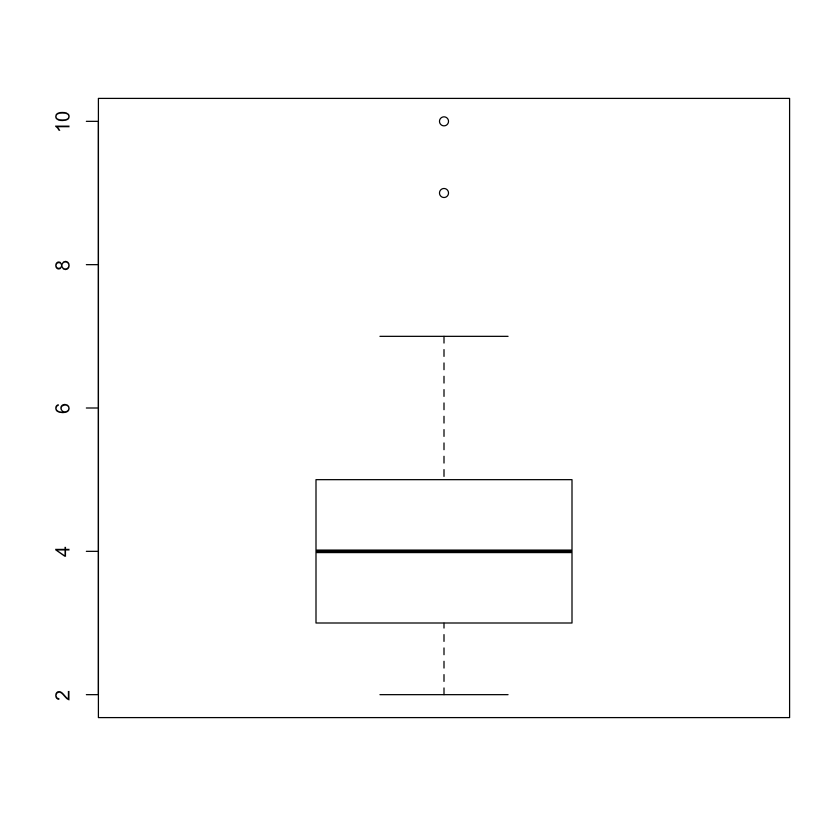

In [12]:
library(rpart)
data("kyphosis")
names(kyphosis)
boxNumber <- boxplot(kyphosis[,"Number"]) # repere

In [13]:
class(boxNumber)
attributes(boxNumber)

[1] "list"

$names
[1] "stats" "n"     "conf"  "out"   "group" "names"

In [15]:
# les individus aberrants
valaberrante <- boxNumber$out
#kyphosis[,"Number"]%in%valaberrante
which(kyphosis[,"Number"]%in%valaberrante)
# On peut traiter ces valeurs comme des valeurs manquantes
 kyphosis[which(kyphosis[,"Number"]%in%valaberrante),"Number"] <- NA
summary(kyphosis)

integer(0)

    Kyphosis       Age             Number          Start      
 absent :64   Min.   :  1.00   Min.   :2.000   Min.   : 1.00  
 present:17   1st Qu.: 26.00   1st Qu.:3.000   1st Qu.: 9.00  
              Median : 87.00   Median :4.000   Median :13.00  
              Mean   : 83.65   Mean   :3.911   Mean   :11.49  
              3rd Qu.:130.00   3rd Qu.:5.000   3rd Qu.:16.00  
              Max.   :206.00   Max.   :7.000   Max.   :18.00  
                               NA's   :2                      

## Concaténer des tableaux de données

Pour regrouper deux tableaux peut être vu de deux façons:

* Aggréger des individus sur lesquels ont été observées les mêmes variables en concaténant des tableaux de données l'un en dessous de l'autre avec la fonction **rbind**.

In [19]:
# exemple rbind sur des matrices avec le même nombre de collonnes
X <- matrix(21:24,ncol=2)
colnames(X) <- paste("X",1:2,sep="")
rownames(X) <- paste("individu",1:2,sep="")
X
Y <- matrix(11:14,ncol=2)
colnames(Y) <- paste("Y",1:2,sep="")
rownames(Y) <- paste("individu",3:4,sep="")
Y
Z <-rbind(X,Y)
Z
class(Z)

X1 X2
individu1 21 23
individu2 22 24

Y1 Y2
individu3 11 13
individu4 12 14

X1 X2
individu1 21 23
individu2 22 24
individu3 11 13
individu4 12 14

[1] "matrix"


* Pour la concaténation des data-frames, il sera nécessaire que les deux data-frame aient les mêmes noms de variables. dans la cas contraire, il sera nécessaire de renommer les variables d'un data-frame.

In [ ]:
Xd <- data.frame(X)
Yd <- data.frame(Y)
Zd <- rbind(Xd,Yd)

In [21]:
colnames(Yd) <- colnames(Xd)
Zd <- rbind(Xd,Yd)
Zd
class(Zd)

X1 X2
individu1 21 23
individu2 22 24
individu3 11 13
individu4 12 14

[1] "data.frame"

* Aggréger des variables qui ont été observées sur les même individus en concaténant des tableaux de données l'un à coté de l'autre avec la fonction **cbind()**.

In [22]:
Xd <- data.frame(matrix(21:24,ncol=2))
colnames(Xd) <- paste("X",1:2,sep="")
rownames(Xd) <- paste("individu",1:2,sep="")
Xd
Yd <- data.frame(matrix(11:14,ncol=2))
colnames(Yd) <- paste("Y",1:2,sep="")
rownames(Yd) <- paste("individu",3:4,sep="")
Yd
Wd <-cbind(Xd,Yd)
Wd


X1 X2
individu1 21 23
individu2 22 24

Y1 Y2
individu3 11 13
individu4 12 14

X1 X2 Y1 Y2
individu1 21 23 11 13
individu2 22 24 12 14

La fonction **cbind()** ne vérifie pas le nom des lignes, les noms des lignes du premier data-frame sont conservés. 

* Il est possible de fusionner deux tableaux selon une **clef** avec la fonction **merge**.

Concaténons deux tableaux de données:
  - le premier tableau regroupe une variable continue (age) et deux variables qualitatives ("prenom" , "ville").

In [23]:
age <- c(45,32,67)
ville <- factor(c("rennes","rennes","marseille"))
prenom <- c("Alice","Marcel","Alexis")
indiv <- cbind.data.frame(age, prenom, ville)
class(indiv)
indiv

[1] "data.frame"

age prenom ville    
1 45  Alice  rennes   
2 32  Marcel rennes   
3 67  Alexis marseille

  - le second tableau regroupe les caractéristiques des villes.

In [24]:
population <- c(300,500,600)
caractVille <- cbind.data.frame(ville =c("rennes","lyon","marseille"),pop=population)
caractVille

ville     pop
1 rennes    300
2 lyon      500
3 marseille 600

On fusionne les tableaux en un seul où seront répétées les caractéristiques des villes à chaque ligne du tableau. On effectue une fusion avec la fonction **merge()** et la clef **ville**.

In [25]:
merge(indiv,caractVille,by="ville")

ville     age prenom pop
1 marseille 67  Alexis 600
2 rennes    45  Alice  300
3 rennes    32  Marcel 300

*exercices*: ~/ced-intror/TP/enonces/ImpExp-tp.pdf

## Tableaux croisés

Lorsqu'on a deux variables qualitatives observées sur un échantillon, les données
peuvent être présentées sous deux formes:

### Tableau de contingences

In [77]:
tension <- factor(c(rep("Faible",5),rep("Forte",5)))
tension
laine <- factor(c(rep("Mer",3),rep("Ang",3),rep("Tex",4)))
laine
# fusionnons ces deux variables dans un data.frame
don <-data.frame(tension, laine) # cbind.data.frame(tension,laine)
# Tableau de contingences
tabcroise <-table(don$tension,don$laine)
class(tabcroise)
tabcroise

[1] Faible Faible Faible Faible Faible Forte  Forte  Forte  Forte  Forte 
Levels: Faible Forte

[1] Mer Mer Mer Ang Ang Ang Tex Tex Tex Tex
Levels: Ang Mer Tex

[1] "table"

        
         Ang Mer Tex
  Faible   2   3   0
  Forte    1   0   4

### Tableaux Individus X Variables

In [78]:
tabframe <- as.data.frame(tabcroise) #
tabframe

Var1   Var2 Freq
1 Faible Ang  2   
2 Forte  Ang  1   
3 Faible Mer  3   
4 Forte  Mer  0   
5 Faible Tex  0   
6 Forte  Tex  4

Nous obtenons une fréquence pour chaque combinaison et non pas une
ligne par individu. (pas très compliqué à obtenir, voir exercice indVarTab.ipynb)

## Manipuler des données avec dplyr

**dplyr** est un package facilitant le traitement et la manipulation de données contenues dans une ou plusieurs tables, la manipulation de données se fait en utilisant un nombre réduit de **verbes**, qui correspondent chacun à une action différente appliquée à un tableau de données.

Les fonctions de dplyr sont en général plus rapides que leur équivalent sous R de base, elles permettent donc de traiter des données de grande dimension.

**dplyr** fait partie du coeur du **tidyverse**, elle est donc chargée automatiquement avec :

In [ ]:
library(tidyverse)

In [ ]:
# lecture des donnees
library(nycflights13)
data(flights)
data(airports)
data(airlines)
#

### Les verbes de dplyr

* **SLICE** : sélectionne des lignes du tableau selon leur position.

In [ ]:
# Selectionner la 345eme ligne du tableau airports
slice(airports, 345)

* **filter** : sélectionne des lignes d’un tableau de données selon une condition.

In [ ]:
# Selectionner les vols du mois de janvier en filtrant sur la variable month
filter(flights, month == 1)
# Vols avec un retard au départ (variable dep_delay) compris entre 10 et 15 minutes 
filter(flights, dep_delay >= 10 & dep_delay <= 15)

* **select** : permet de sélectionner des colonnes d’un tableau de données. 

In [ ]:
# Extraire les colonnes lat et lon du tableau airports
select(airports, lat, lon)
# Eliminer les colonnes lat et lon du tableau airport
select(airports, -lat, -lon)

* **rename** : permet de renommer facilement des colonnes d'un tableau de données (nouveau_nom = ancien_nom).

In [ ]:
# Renommer les colonnes lon et lat de airports en longitude et latitude 
rename(airports, longitude = lon, latitude = lat)

* ** arrange** : réordonne les lignes d’un tableau selon une ou plusieurs colonnes.

In [ ]:
# Trier le tableau flights selon le retard au départ croissant 
arrange(flights, dep_delay)
# Trier le tableau flights selon selon le mois, puis selon le retard au départ
arrange(flights, month, dep_delay)
# Trier selon une colonne par ordre décroissant
arrange(flights, desc(dep_delay))

* **mutate** : permet de créer de nouvelles colonnes dans le tableau de données, en général à partir de variables existantes.

In [ ]:
# airports contient l’altitude en pieds, créer une nouvelle variable alt_m avec l’altitude en mètres
airports <- mutate(airports, alt_m = alt / 3.2808)
select(airports, name, alt, alt_m)

**mutate** est compatible avec les fonctions de recodages : forcats, if_else, case_when …

In [ ]:
flights <- mutate(flights,
                  type_retard = case_when(
                    dep_delay > 0 & arr_delay > 0 ~ "Retard départ et arrivée",
                    dep_delay > 0 & arr_delay <= 0 ~ "Retard départ",
                    dep_delay <= 0 & arr_delay > 0 ~ "Retard arrivée",
                    TRUE ~ "Aucun retard"))

### Enchaîner les opérations avec le pipe

Quand on manipule un tableau de données, il est très fréquent d’enchaîner plusieurs opérations. On va par exemple filtrer pour extraire une sous-population, sélectionner des colonnes puis trier selon une variable.

#### Plusieurs méthodes

* Effectuer toutes les opérations en une fois en les “emboîtant” 

* Effectuer les opérations les unes après les autres, en stockant les résultats intermédiaires dans un objet temporaire.

In [ ]:
filter(flights, dest == "LAX")

In [ ]:
summary(flights)
tmp <- filter(flights, dest == "LAX")
tmp <- select(tmp, dep_delay, arr_delay)
arrange(tmp, dep_delay)

* Utiliser l'opérateur **pipe** noté **%>%**

**expr %>% f**, le résultat de l’expression *expr*, à gauche du pipe, sera passé comme premier argument à la fonction *f*, à droite du pipe, ce qui revient à exécuter **f(expr)**.

In [ ]:
# filter(flights, dest == "LAX")
flights %>% filter(dest == "LAX")

In [ ]:
# select(filter(flights, dest == "LAX"), dep_delay, arr_delay)
flights %>% filter(dest == "LAX") %>% select(dep_delay, arr_delay)

Pour en savoir plus consulter : https://juba.github.io/tidyverse/10-dplyr.html#preparation-2

## Manipulation de chaînes de caractères

La manipulation de chaînes de caractères intervient fréquement dans une étude particulièrement dans le nettoyage ou la préparation des données. 

Le package de base R fournit quelques fonctions: <br>
- **paste**: concaténation de chaînes, <br>
- **nbchar**: nombre de caractère, <br>
- **substr**: extraction/remplacement de chaine dans un vecteur de caractères.<br>
- ...

Le package **stringr** fournit une interface propre et performante pour le traitement de ces chaînes de caractères ([stringr: modern,consistent string processing](https://journal.r-project.org/archive/2010-2/RJournal_2010-2_Wickham.pdf).

Nous présentons quelques fonctions du package **stringr**, pour en savoir plus consulter le help et la documentation du package.

Les fonctions présentées sont pour la plupart prévues pour fonctionner avec [**des expressions régulières**](https://thinkr.fr/r-les-expressions-regulieres/)(ou http://perso.ens-lyon.fr/lise.vaudor/strings-et-expressions-regulieres/). Par soucis de simplicité, les exemples seront donnés autant que possible avec de simples chaînes, sans expression régulière. Mais pour manipuler des données textuelles, il peut être très utile de s’intéresser à la syntaxe des expressions régulières.

Les exemples fournis sont issus de [Rblogs / lang](https://www.r-bloggers.com/lang/about).

### Concaténer des chaînes de caratères

* La fonction **paste** du package de base R

In [ ]:
# Les donnees utilisees
d <- list(
  nom = c("Mr Félicien Machin", "Mme Raymonde Bidule", "M. Martial Truc", "Mme Huguette Chose"),
  adresse = c("3 rue des Fleurs", "47 ave de la Libération", "12 rue du 17 octobre 1961", "221 avenue de la Libération"),
  ville = c("Nouméa", "Marseille", "Vénissieux", "Marseille") 
)

Avec la fonction paste, on concatène l'adresses et la ville en ajoutant un blanc.

* On pourra également utiliser la fonction **str$\_$c** du package **stringr**, on ajoute une chaîne vide.

In [ ]:
paste(d$adresse,d$ville) # On concatène l'adresse et la ville en ajoutant un blanc par défaut
# avec le package stringr
library(stringr)
str_c(d$adresse,d$ville) # 

* On concatène l'adresse et la ville en ajoutant un séparateur avec l'argument **sep=""**

In [ ]:
str_c(d$adresse,d$ville,sep=" ") # équivalent de la fonction paste par défaut
#
paste(d$adresse,d$ville,sep=" - ") # On concatène l'adresse et la ville en ajoutant un " - " entre

### Longueur d'une chaîne : 
* la fonction **str_length**: équivalent de la fonction **nchar**

In [ ]:
nchar("abc")
nchar(NA)
nchar(factor("abc"))

In [ ]:
str_length("abc")
str_length(NA)
str_length(factor("abc"))

### Extraction/ Remplacement  d'une sous-chaîne 
* La fonction **str_substr**: équivalent de **substr**

In [ ]:
# Extraction 
str_sub("abcdef", 1, 3) # extraction des éléments 1 à 3
str_sub("abcdef", 4)    # extraction à partir du 4 iéme élélent
str_sub("abcdef", -2)   # Extraction des deux derniers éléments

In [ ]:
# Remplacement
x <- "abcdef"
str_sub(x, 1, 3) <- "aaa"
x

### Suppression des espaces en début et fin 
* la fonction **str_trim**

In [ ]:
str_trim("  abc    ") # suprimme en début et en fin
str_trim("  abc    ",side="left")

### Détecter la présence d'un motif : 

**str_detect**: renvoie un vecteur logique indiquant si le motif a été repéré pour chaque élément d'un vecteur : 

In [29]:
ch <- c("M. patate", "brocolis patissiers", "patates patissieres")
str_detect(ch, "patate")

[1]  TRUE FALSE  TRUE

### Localiser un motif 
**str_locate**: renvoie les positions de la première occurrence d'un *motif* dans chaque élément d'un vecteur<br>
**str_locate_all**: renvoie les positions de toutes les occurrences du *motif*  

In [30]:
str_locate(ch, "patiss.*r")

start end
[1,] NA    NA 
[2,] 10    18 
[3,]  9    17

In [31]:
str_locate_all(ch, "pat")

[[1]]
     start end
[1,]     4   6

[[2]]
     start end
[1,]    10  12

[[3]]
     start end
[1,]     1   3
[2,]     9  11

### Extraire des sous-chaînes

* **str_extract** fonctionne de la même manière que *str_locate* mais renvoit le texte correspondant au *motif* plutôt que la position : 

In [28]:
str_extract(ch, "pat.*")

[1] "patate"              "patissiers"          "patates patissieres"

[1] "science" NA        "science"

In [ ]:
str_extract_all(ch, "pat.")

* **str_match** fonctionne comme **str_extract** mais permet de différencier les groupements. La fonction renvoit une matrice dont la première colonne est l'extraction du motif dans son ensemble, et les colonnes suivantes l'extraction de chaque groupe : 

In [ ]:
ch
str_match(ch, "(.*) (patissier.*)$")

### Remplacement de motif

**str_replace** est équivalent aux fonctions **sub** et **gsub**  

In [ ]:
str_replace_all(ch, "patate(.?)\\b", "pomme\\1 de terre")

### Découper selon un motif

**str_split** découpe une chaîne en un nombre variable de sous-chaînes selon un motif de séparation. 

In [ ]:
ch <- "un et deux et trois et quatre"
str_split(ch, " et ")

## Documentation

### Gestion de données dans R

* [Introduction à R et au tidyverse](https://juba.github.io/tidyverse/index.html)

* [Gestion des données avec R](https://www.fun-mooc.fr/c4x/UPSUD/42001S03/asset/data-management.html) (Christophe Lalanne & Bruno Falissard -MOOC "Introduction à la statistique avec R").

* [Begin'R (Bordeaux INP](http://beginr.u-bordeaux.fr/index.html#sommaire))

* [Cookbook for R](http://www.cookbook-r.com/Manipulating_data/)

### Manipulation de chaînes de caractères
* Article dans R Journal de *Hadley Wickham* [stringr: modern, consistent string
processing](https://journal.r-project.org/archive/2010-2/RJournal_2010-2_Wickham.pdf) <br>


* [Documentation du package *stringr*](https://cran.r-project.org/web/packages/stringr/index.html) sur le CRAN ou dans son implémentation.


* [Introduction à R et au tidyverse](https://juba.github.io/tidyverse/11-stringr.html) de Julien Barnier